In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# this line enables inline plotting in Jupyter notebooks
%matplotlib inline
import sklearn


#### Load Boston House Pricing Dataset

In [42]:
from sklearn.datasets import load_boston
boston = load_boston()

f:\PROJECT\End-To-End-ML-project-Boston-House-price-prediction-\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datas

#### Understanding of the entire dataset

In [43]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

#### Dataset description

In [44]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Data of each row

In [45]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [46]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [47]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [48]:
boston.filename

'boston_house_prices.csv'

In [49]:
boston.data_module

'sklearn.datasets.data'

#### Preparaing the dataset

In [50]:
# converting to dataframe
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)
dataset['PRICE']=boston.target

In [51]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [53]:
# summarizing the entire statistics of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [54]:
# Check for missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### EDA
#####  In case of Linear regression coorelation is very important
##### so we will find the coorelation of each and every feature with the target feature PRICE

In [55]:
# when 2 or more independent features are highly correlated it is called multicollinearity
#it creates problem in regression model as it becomes difficult to find the actual effect of 
# independent feature on dependent feature. To avoid this we will drop one of the highly correlated features 
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


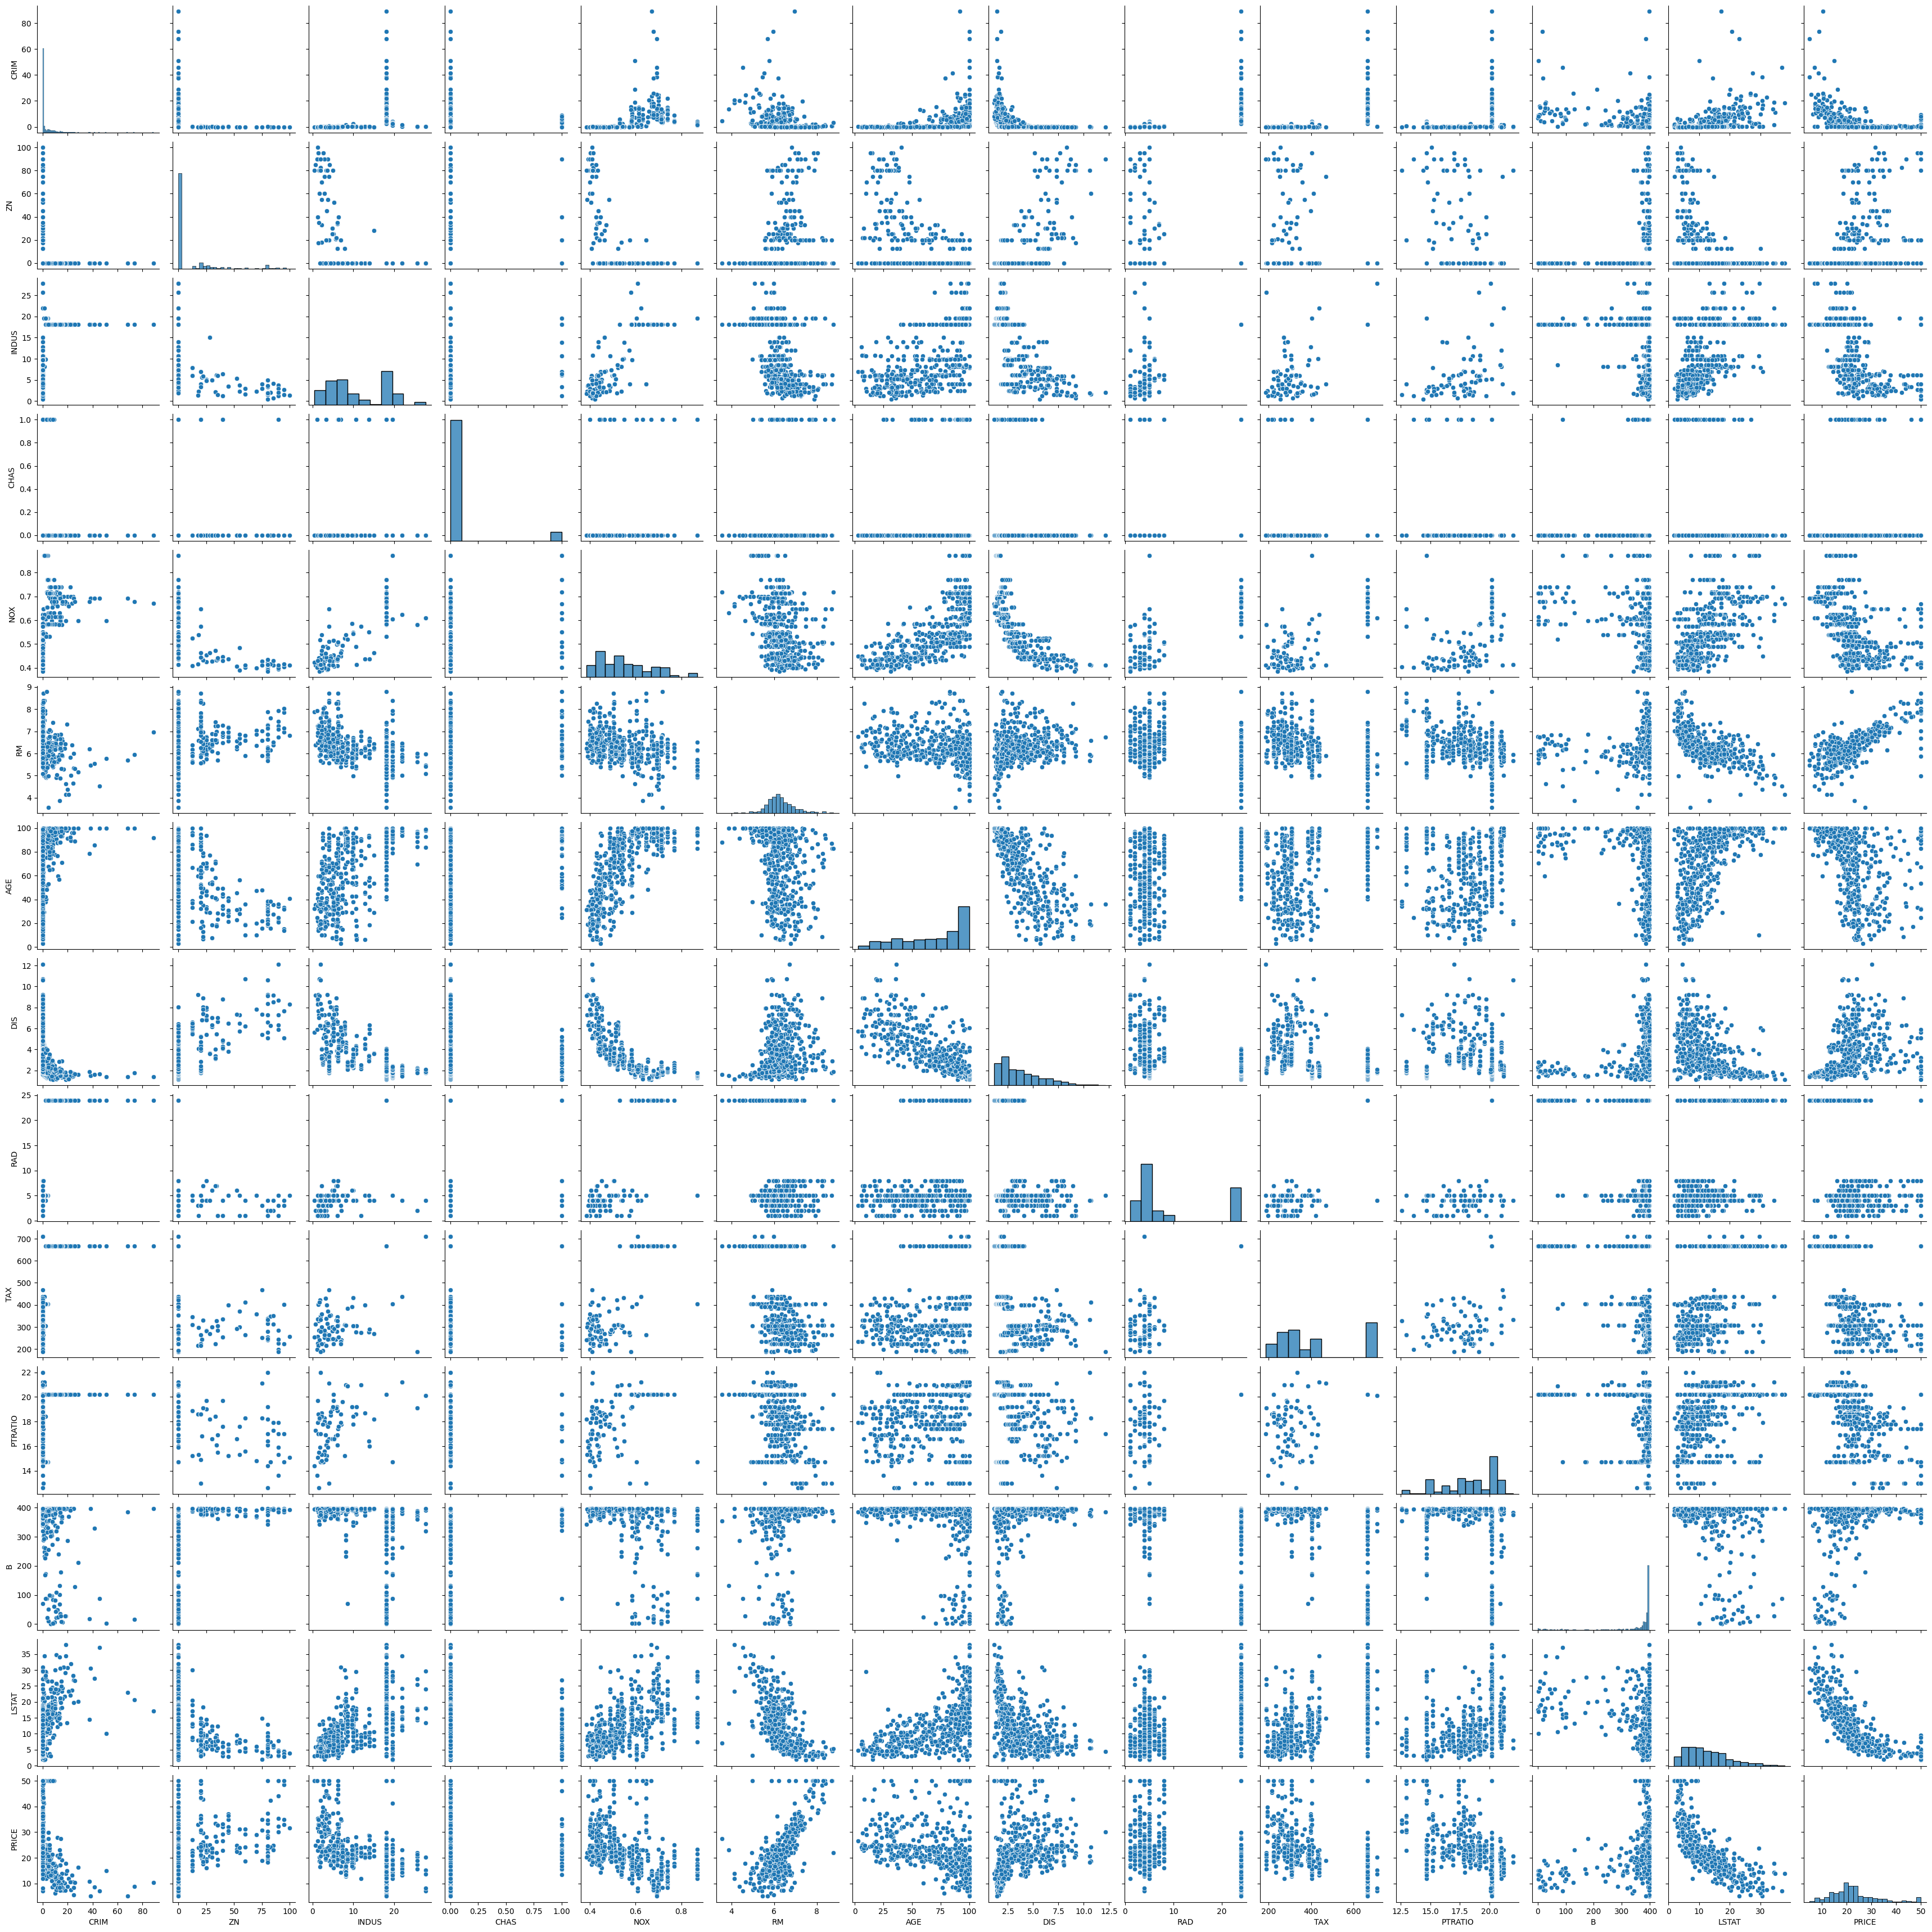

In [56]:
import seaborn as sns
sns.pairplot(dataset)

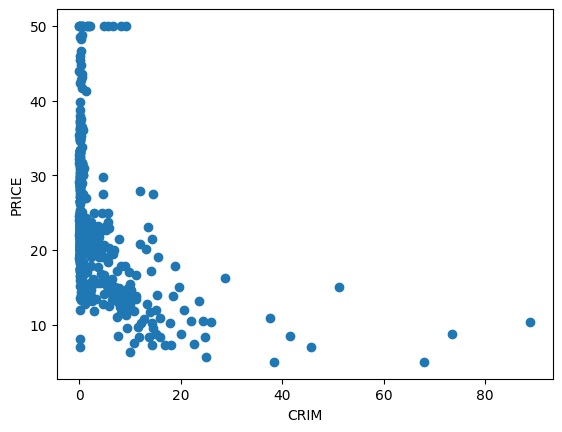

In [57]:
# when crime increases price decreases it shows negative correlation
plt.scatter(dataset['CRIM'], dataset['PRICE'])
plt.xlabel('CRIM')
plt.ylabel('PRICE')
plt.show()

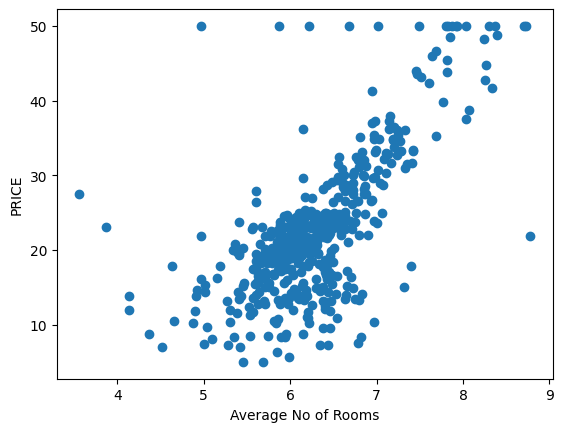

In [58]:
# when average no of rooms increases price also increases it shows positive correlation
plt.scatter(dataset['RM'], dataset['PRICE'])
plt.xlabel('Average No of Rooms')
plt.ylabel('PRICE')
plt.show()

<Axes: xlabel='RM', ylabel='PRICE'>

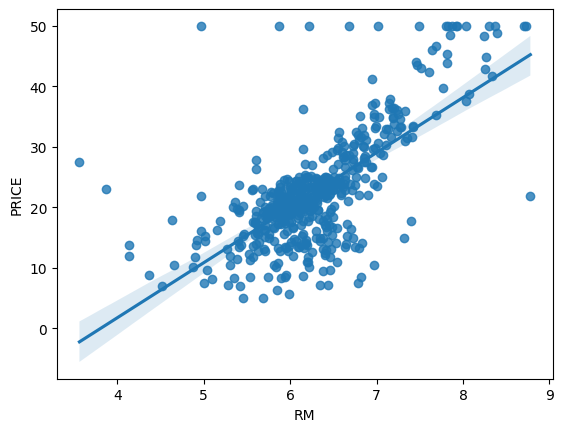

In [59]:
# regression plot
# it shows the best fit line
import seaborn as sns
sns.regplot(x='RM', y='PRICE', data=dataset)

<Axes: xlabel='LSTAT', ylabel='PRICE'>

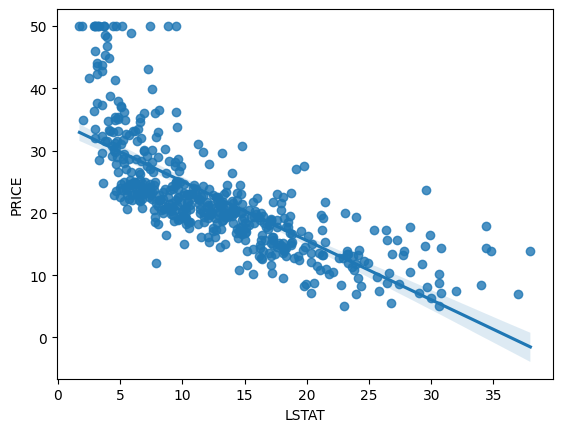

In [60]:
# LSTSAT vs PRICE
# Lstat: % of lower status of the population
# when LSTAT increases PRICE decreases it shows negative correlation
sns.regplot(x='LSTAT', y='PRICE', data=dataset)

<Axes: xlabel='CHAS', ylabel='PRICE'>

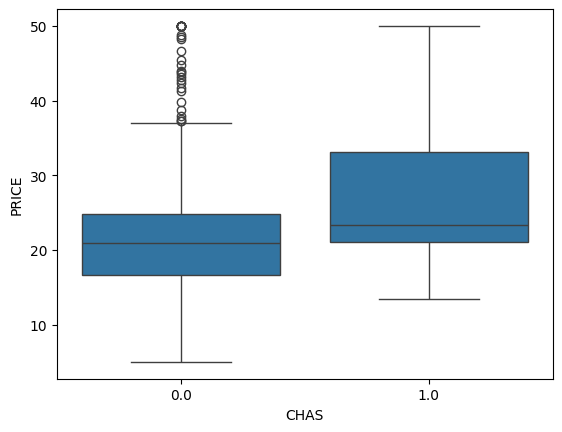

In [61]:
# CHAS MEANS RIVER BOUNDARY
# it is a categorical feature
# where there is river boundary price is higher
# in case categorical feature box plot is used not regplot
sns.boxplot(x='CHAS', y='PRICE', data=dataset)

<Axes: xlabel='PTRATIO', ylabel='PRICE'>

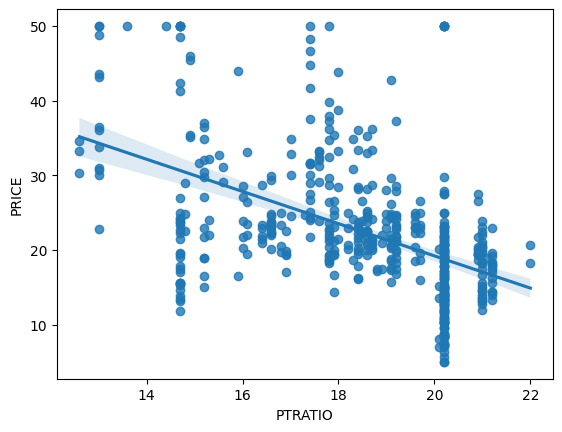

In [62]:
# PTRATIO vs PRICE
# when PTRATIO increases PRICE decreases it shows negative correlation
# PTRATIO: pupil-teacher ratio by town
# it means when there are more students per teacher the quality 
# of education decreases
sns.regplot(x='PTRATIO', y='PRICE', data=dataset)


In [63]:
# Independednt and Dependent Features
X=dataset.drop('PRICE', axis=1)
y=dataset['PRICE']

In [64]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [65]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [66]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)               

In [67]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [68]:
# standardize the dataset so that all the features are on the
# same scale
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [69]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [70]:
X_train

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [83]:
len(X_train[0])

13

In [71]:
X_test

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

#### Why stdscaller?
##### Internally use of gradient descent has been happened and so our goal is to come to the global minima and 
##### to come to the global minima we have to make sure that all independent feature should have to be in same scale so that
##### convergence happens first. 

#### Model Traing

In [72]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [73]:

regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
# print the coefficients of the model
print(regressor.coef_)

[-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


In [75]:
# intercept means the value of y when all independent features 
# are 0 that means where the y axis intercepts the line
regressor.intercept_

22.796534653465375

In [76]:
# Get the parameters of the model
# These are the hyperparameters of the model
# hyperparameters are the parameters which we set
# before training the model
# copy_X': True means whether to copy X or not
# fit_intercept': True means whether to calculate 
# the intercept for this model or not
# n_jobs': None means the number of jobs to use for
# the computation
# normalize': 'deprecated' means this parameter is
# deprecated and will be removed in future versions
# positive': False means whether to force the coefficients
# to be positive or not
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [77]:
### prediction 
reg_predictions = regressor.predict(X_test)
reg_predictions

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

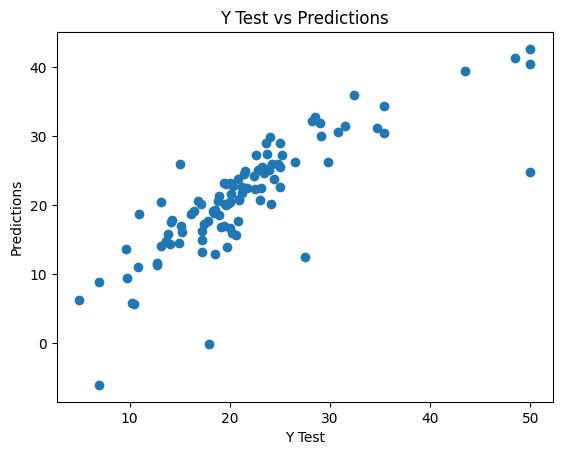

In [78]:
### plot a scatter plot for the prediction
plt.scatter(y_test, reg_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')
plt.title('Y Test vs Predictions')
plt.show()

In [79]:
# residuals
#residuals are the difference between actual values and predicted 
# values
residuals = y_test - reg_predictions
residuals

173    -5.396724
274    -3.625565
491    -1.216944
72     -2.231979
452    -2.669880
         ...    
412    18.064237
436    -4.084867
411     1.016403
86      0.223780
75     -3.079024
Name: PRICE, Length: 102, dtype: float64

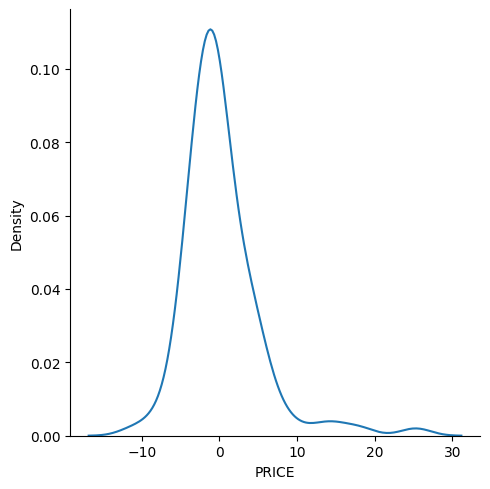

In [ ]:
# plot the residuals
# this plot indicates that residuals are normally distributed
# which is a good sign for regression model
# kde means kernel density estimation
# It’s a non-parametric way to estimate the probability density 
# function (PDF) of a random variable. In simple words, KDE is used 
# to estimate the shape of the data distribution smoothly, instead of
# using a rough histogram.
sns.displot(residuals, kind='kde')

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, reg_predictions)
mse = mean_squared_error(y_test, reg_predictions)
rmse = np.sqrt(mse)

In [82]:
print(mae)
print(mse)
print(rmse)

3.189091965887848
24.29111947497351
4.928602182665336


#### R square and adjusted R square

###### R^2 = 1 - (SSR/SST)
###### R^2 = coefficient of determination
###### SSR = sum of squares of residuals
###### SST = Total sum of squares 

In [ ]:
# r2_score value indicates how well the model fits the data
# Use R² to check how much variance your model captures.
# Use Adjusted R² to check if added features genuinely improve the model.
# added features may lead to overfitting

from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test, reg_predictions)
print(r2_score_value)

0.6687594935356321


In [85]:
#adjusted R square
# adjusted R^2 = 1 - [(1-R^2)*(n-1)/(n-p-1)]
# where n is the number of observations 
# p is the number of independent features
# adjusted_r2 indicates the goodness of fit of the model
# it penalizes the R2 value if we add more independent features

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2_score_value) * (n - 1) / (n - p - 1))
print(adjusted_r2)

0.6198262368988505


```
If the added feature does NOT improve the model, then:

✅ Adjusted R² will DECREASE

This is the key advantage of Adjusted R² — it penalizes useless features.

Scenario Example

Metric	    Before adding feature	     After adding bad feature
R² score	      0.80	                   0.81 (slightly ↑)
Adjusted R²	      0.79	                   0.77 ↓ (goes down)

Interpretation:

R² always increases or stays same, even for useless features → misleading

Adjusted R² goes DOWN if the feature does not truly improve the prediction power


That means:

“This extra feature is useless or harmful — remove it.”


Final Answer:

If the newly added feature does not help, Adjusted R² will drop (decrease) to indicate bad or unnecessary feature. ✅
```

#### New Data Prediction

In [ ]:
# shape of first row or data point which has 13 features
# data point means one observation
# each observation has 13 independent features
# but it is in array format we need to convert it into 2D array
# because sklearn expect 2D array for prediction
boston.data[0].shape

(13,)

In [89]:
# Now we will predict the price of house for this data point
# we need to reshape it to 2D array
boston.data[0].reshape(1, -1).shape

(1, 13)

In [91]:
#Now we will predict the price of house for this data point
# before prediciton whe have to standardize the data point

data_point = scaler.transform(boston.data[0].reshape(1, -1))
new_data_prediction = regressor.predict(data_point)
print(new_data_prediction)

[29.95339638]


f:\PROJECT\End-To-End-ML-project-Boston-House-price-prediction-\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Pickling the Model for Deployment

In [92]:
import pickle
with open("regressor_model.pkl", "wb") as file:
    pickle.dump(regressor, file)

In [93]:
#save the scaler as well
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)